# Feature Engineering on Image Data

In [1]:
##--Import necessary dependencies and settings

import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

# The scikit-image (skimage) library is an excellent framework 
# consisting of several useful interfaces
# and algorithms for image processing and feature extraction.

# Image Metadata Features

There are tons of useful features obtainable from the image metadata itself without even processing the image. Most of this information can be found from the EXIF data, which is usually recorded for each image by the device when the picture is being taken. Following are some of the popular features that are obtainable from the image EXIF data.
• Image create date and time
• Image dimensions
• Image compression format
• Device make and model
• Image resolution and aspect ratio
• Image artist
• Flash, aperture, focal length, and exposure

# Raw Image and channel pixel values
An image can be represented by the value of each of its pixels as a two dimensional array. We can leverage numpy arrays for this. However, color images usually have three components also known as channels. The R, G, and B channels stand for the red, green, and blue channels, respectively. This can be represented as a three dimensional array (m, n, c) where m indicates the number of rows in the image, n indicates the number of columns. These are determined by the image dimensions. The c indicates which channel it represents (R, G or B). Let’s load some sample color images now and try to understand their representation.

In [3]:
cat = io.imread('datasets_n_images/images/cat.png')
dog = io.imread('datasets_n_images/images/dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])

print(cat.shape, dog.shape)

(168, 300, 3) (168, 300, 3)


In [4]:
df

,Image
0,Cat
1,Dog


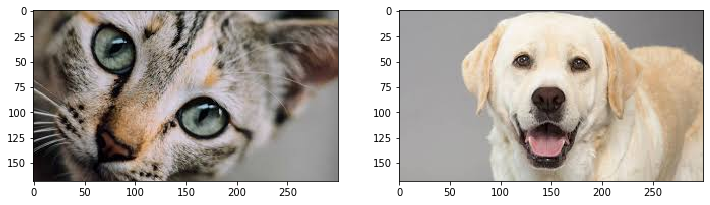

In [5]:
# plot the images 
fig = plt.figure(figsize = (12,8)) # widht and height in inches
ax1 = fig.add_subplot(1,2, 1)#1 row 2 col 1st cell
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2, 2)#1 row 2nd col 2nd cell
ax2.imshow(dog)
plt.show()

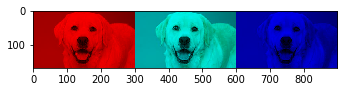

In [6]:
# We can clearly see that we have two images of a cat and a dog 
# having dimensions 168 x 300 pixels where each row and column 
# denotes a specific pixel of the image. The third dimension indicates 
# these are color images having three color channels. 
# Let’s now try to use numpy indexing to slice out and extract 
# the three color channels separately for the dog image.

dog_r = dog.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0

dog_g = dog.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0

dog_b = dog.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(plot_image)
plt.show() 

# please note that subplot(1,2,2) is empty

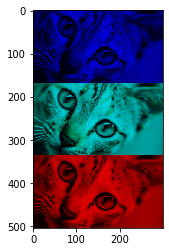

In [13]:
dog1_r = cat.copy() # blue Channel
dog1_r[:,:,0] = dog1_r[:,:,1] = 0 # set G,B pixels = 0

dog_g = cat.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0

dog_b = cat.copy() # red Channel
dog_b[:,:,1] = dog_b[:,:,2] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog1_r, dog_g, dog_b), axis=-0)
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(plot_image)
plt.show() 


# Grayscale Image Pixels
If you are dealing with color images, it might get difficult working with multiple channels and three-dimensional arrays. Hence converting images to grayscale is a nice way of keeping the necessary pixel intensity values but getting an easy to process two-dimensional image. 

Grayscale images usually capture the luminance or intensity of each pixel such that each pixel value can be computed using the equation:

Y = 0.2125 x R + 0.7154 x G + 0.0721 x B

Where R, G & B are the pixel values of the three channels and Y captures the final pixel intensity information and is usually ranges from 0(complete intensity absence - black) to 1(complete intensity presence - white).

In [14]:
# Grayscale image pixel values

from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image shape:', cgs.shape)

# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

Image shape: (168, 300)
2D image pixel map
[[0.42 0.41 0.41 ... 0.5  0.52 0.53]
 [0.41 0.41 0.4  ... 0.51 0.52 0.54]
 [0.4  0.4  0.4  ... 0.52 0.54 0.55]
 ...
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]
 [0.11 0.11 0.1  ... 0.51 0.51 0.51]] 

Flattened pixel map: [0.42 0.41 0.41 ... 0.51 0.51 0.51]


# Binning Image Intensity Distribution

We already obtained the raw image intensity values for the grayscale images in the previous section. One approach would be to use these raw pixel values themselves as features. Another approach would be to binning the image intensity distribution based on intensity values using a histogram and using the bins as features.

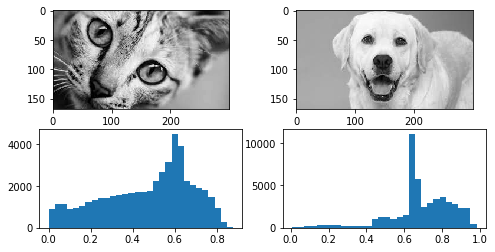

In [15]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")

ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray') # cmap means colour map
                             # and cmap = gray means grayscale

ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
# c_freq holds the frequency value of the grayscale in that bin
# c_bin holds 31 bin boundary values, i.e 30 bin ranges
# c_patches holds height of each patch

ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)
plt.show()


#---------for self use ----
# print("printing the frequencies", d_freq)
# print("printing the bins", d_bins)
# print("printing the patches")
# for x in range(len(d_patches)): 
    # print(d_patches[x])
#---------------------------

In [9]:
print("printing the frequencies", d_freq)
print("\nprinting the bins", d_bins)
print("\nprinting the patches")
for x in range(len(d_patches)): 
    print(d_patches[x])

printing the frequencies [   62.    87.   204.   256.   275.   302.   329.   336.   215.   200.
   169.   163.   159.  1070.  1221.  1303.  1069.  1301.  1547. 11120.
  5817.  2426.  2891.  3370.  3641.  3030.  2772.  2365.  2292.   408.]

printing the bins [0.0075     0.03992775 0.0723555  0.10478325 0.13721101 0.16963876
 0.20206651 0.23449426 0.26692201 0.29934976 0.33177752 0.36420527
 0.39663302 0.42906077 0.46148852 0.49391627 0.52634403 0.55877178
 0.59119953 0.62362728 0.65605503 0.68848278 0.72091054 0.75333829
 0.78576604 0.81819379 0.85062154 0.88304929 0.91547705 0.9479048
 0.98033255]

printing the patches
Rectangle(xy=(0.0075, 0), width=0.0324278, height=62, angle=0)
Rectangle(xy=(0.0399278, 0), width=0.0324278, height=87, angle=0)
Rectangle(xy=(0.0723555, 0), width=0.0324278, height=204, angle=0)
Rectangle(xy=(0.104783, 0), width=0.0324278, height=256, angle=0)
Rectangle(xy=(0.137211, 0), width=0.0324278, height=275, angle=0)
Rectangle(xy=(0.169639, 0), width=0.0324278, 

Image intensity ranges from 0 to 1 and is evident by the x-axes. The y-axes depict the frequency of the respective bins. We can clearly see that the dog image has more concentration of the bin frequencies around 0.6 - 0.8 indicating higher intensity and the reason for that being that the Labrador dog is white in color and white has a high intensity value.

# Edge Detection

One of the more interesting and sophisticated techniques involve detecting edges in an image. Edge detection algorithms can be used to detect sharp intensity and brightness changes in an image and find areas of interest. 

The canny edge detector algorithm developed by John Canny is one of the most widely used edge detector algorithms today. This algorithm typically involves using a Gaussian distribution with a specific standard deviation σ (sigma) to smoothen and denoise the image. Then we apply a Sobel filter to extract image intensity gradients. Norm value of this gradient is used to determine the edge strength.

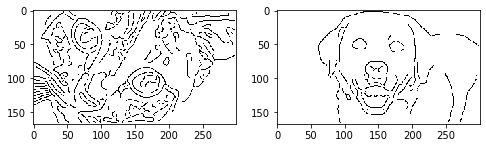

In [30]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=2)  # sigma=3 (int) or 0.33(float) mean same  
dog_edges = canny(dgs, sigma=2)
# Note : lower the sigma tighter the threshold
# the whereas a larger value of sigma  gives a wider threshold
# try sigma value 0.5 to 7


fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')  # cmap means colour map
                                      # and cmap = binary means black n white
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')
plt.show()